# Objectives
Try to determine which news sources have the most reliable data to inform decisions in the stock market. We will be analyzing tweets from big companies such as Bloomberg, JP Morgan, and Goldman Sachs to see whether their tweets or the general sentiment of responses are correlated with increases or decreases in stock prices. We will use this as a benchmark to compare less popular sources of stock market data such as Reddit.

# Data Sources
- Twitter Kaggle Datasets/API
- Reddit API
- Kaggle Stock Market Datasets
- Yahoo Finance API

# Hypothesis
We think that the sentiment of tweets from big stock market information sources will be reliable and have a positive correlation to stock prices. Less popular sources for stock information like Reddit will be more error prone, but will provide opportunities that yield high profit. The reasoning behind this is that people trust news from companies such as Bloomberg making those bets safer, but also less profitable. Random insights from Redditors may be wrong most of the time, but may "hit the jackpot."

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import yfinance as yf

# Exploration of [Twitter Kaggle Dataset](https://www.kaggle.com/davidwallach/financial-tweets)
This dataset contains financial tweets regarding stocks traded on NYSE, NASDAQ, and the S&P 500.

In [2]:
skiprows = [730, 2835, 3057, 3112, 3193, 3204, 3254, 3519, 4077, 4086, 4087, 4498]
tweet_df = pd.read_csv('./datasets/stockerbot-export.csv', skiprows=skiprows, parse_dates=['timestamp'])
tweet_df.head()

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,2018-07-18 21:33:26+00:00,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,2018-07-18 22:22:47+00:00,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,2018-07-18 22:32:01+00:00,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,2018-07-18 22:52:52+00:00,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,2018-07-18 23:00:01+00:00,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


Text(0.5, 0, 'Number of Times Tweeted')

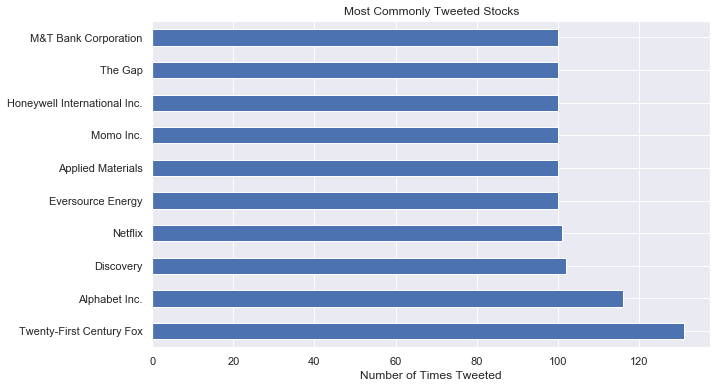

In [3]:
ax = tweet_df.company_names.value_counts().sort_values(ascending=False).head(10).plot.barh(figsize=(10, 6))
ax.set_title('Most Commonly Tweeted Stocks')
ax.set_xlabel('Number of Times Tweeted')

It is nice to see that this dataset has many tweets (around 100) for the most frequent companies. This will help us in determing the general sentiment around these companies over time to compare to stock prices. Many big names such as 21st Century Fox, Alphabet (parent company of Google), and Netflix also appear which are very established companies.

Text(0.5, 0, 'Twitter Users')

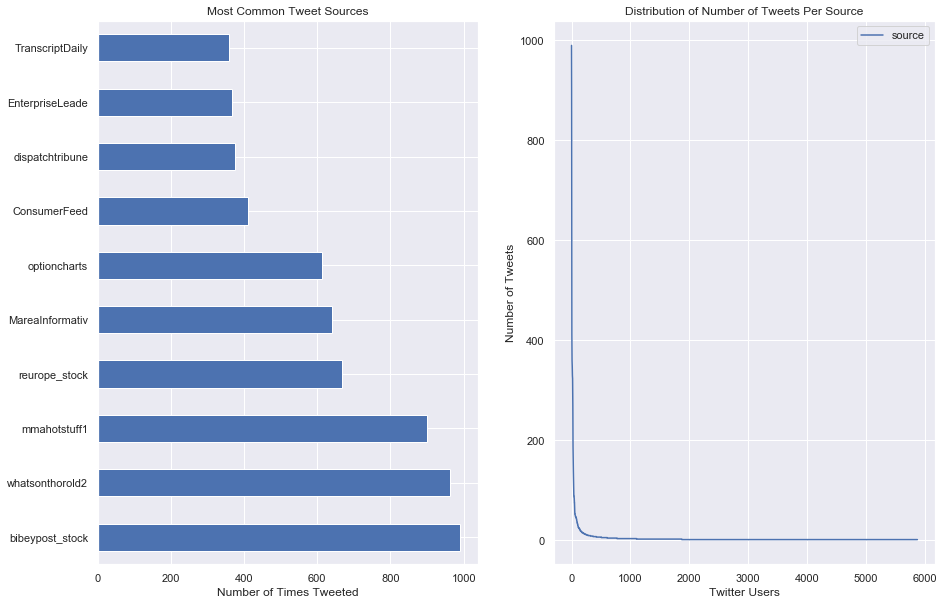

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)

tweet_df.source.value_counts().head(10).plot.barh(ax=ax1, figsize=(15, 10))
ax1.set_title('Most Common Tweet Sources')
ax1.set_xlabel('Number of Times Tweeted')

tweet_df.source.value_counts().reset_index().plot(ax=ax2)
ax2.set_title('Distribution of Number of Tweets Per Source')
ax2.set_ylabel('Number of Tweets')
ax2.set_xlabel('Twitter Users')

This is also a nice feature of our data. The bar chart on the left worried me that our dataset was only going to have a few users that tweet a lot. This would create a lot of bias in any correlations we find. But if you look at the distribution graph on the right, it shows that there are only a few users who really tweet a lot; most users in this dataset only tweet a few times which gives us a better sample. Later we will try using the Twitter API to sample a lot of tweets from specific demographics of users.

Text(0, 0.5, 'Count')

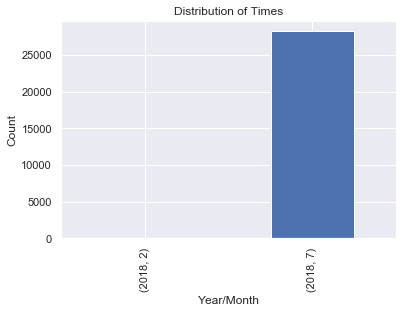

In [5]:
ax = tweet_df.groupby([tweet_df.timestamp.dt.year, tweet_df.timestamp.dt.month])['id'].count().plot(kind='bar')
ax.set_title('Distribution of Times')
ax.set_xlabel('Year/Month')
ax.set_ylabel('Count')

The one unfortunate thing about this dataset is it primarily includes tweets from July 2018 and a few tweets it seems from February 2018. We will likely need to pull in more data using the Twitter API, but this dataset will provide a good starting place.

# Collecting Stock Data Through Yahoo Finance API
We were originally going to compare this Twitter dataset against some Kaggle stocks datasets. Given that our Twitter dataset only covers one month and the Kaggle datasets are very large, we are instead going to use the yfinance Python module to collect data for this specific month.

In [6]:
# Lets identify the top 30 stocks from our Twitter dataset and use that with yfinance
tweet_df.symbols.value_counts().sort_values(ascending=False)

NFLX             101
MTB              100
AMAT             100
HON              100
GPS              100
                ... 
TWTR               1
GS                 1
AMZN-GPS           1
FB-GOOGL-GOOG      1
M                  1
Name: symbols, Length: 453, dtype: int64